## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [152]:
df_flights_sample = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/flights_sample.csv")



In [151]:
def prepare_data_flights(df):

    
    df.drop(columns=['branded_code_share','mkt_carrier'], inplace=True) #these are the same value as mkt_unique_carrier
    df.drop(columns=['mkt_carrier_fl_num'], inplace=True) ##is the same value as op_carrier_fl_num
    df.drop(columns=['origin_airport_id', 'dest_airport_id'], inplace=True) #using airport codes instead 'origin' and 'dest'
    df.drop(columns=['dup', 'flights'], inplace=True) # have the same values
    df.drop(columns=['no_name'], inplace=True) ##columns not documented on dataset provided by LHL

    df[['city_orig','state_orig']] = df['origin_city_name'].str.split(', ', expand=True)  #split city and name of origin
    df[['city_dest','state_dest']] = df['dest_city_name'].str.split(', ', expand=True)  #split city and name of origin
    df.drop(columns=['origin_city_name','dest_city_name'], inplace=True) #using new city and state columns instead

#change datetime columns and rename columns for easier understanding
    df['fl_date'] = df['fl_date'].astype('datetime64[ns]')
    df.rename(columns={'fl_date': 'FlightDate'}, inplace=True) 

    df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'], unit='m', errors='coerce').dt.strftime("%H:%M")
    df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], unit='m', errors='coerce').dt.strftime("%H:%M")
    df['dep_time'] = pd.to_datetime(df['dep_time'], unit='m', errors='coerce').dt.strftime("%H:%M")
    df.rename(columns={'dep_time': 'ActualDeparture'}, inplace=True) 
    df.rename(columns={'crs_dep_time': 'DepartureTime','crs_arr_time': 'ArrivalTime'}, inplace=True) 
    df.rename(columns={'crs_elapsed_time': 'ElapsedTimeFlight,'}, inplace=True)
    df.rename(columns={'crs_elapsed_time': 'ElapsepTimeScheduled'}, inplace=True)
    df.rename(columns={'mkt_unique_carrier': 'UniqueMarketingCarrierCode'}, inplace=True)
    df.rename(columns={'op_unique_carrier': 'UniqueScheduledOperatingCarrierCode'}, inplace=True)
    df.rename(columns={'op_carrier_fl_num': 'FlightNumber'}, inplace=True)
    df.rename(columns={'tail_num': 'TailNumber'}, inplace=True) 
    df.rename(columns={'origin': 'OriginIATA'}, inplace=True) 
    df.rename(columns={'dest': 'DestinationIATA'}, inplace=True) 
    df.rename(columns={'distance': 'DistanceAirports'}, inplace=True)
    df.rename(columns={'air_time': 'FlightTime'}, inplace=True)
    df.rename(columns={'dep_delay': 'Delay_Departure'}, inplace=True)  
    
    df.rename(columns={'city_dest':'DestinationCity','state_dest':'DestinationState','city_orig':'OriginCity','state_orig':'OriginState'}, inplace=True)
    df.rename(columns={'carrier_delay':'Delay_Carrier','weather_delay':'Delay_Weather','nas_delay':'Delay_NationalAirSystem','security_delay':'Delay_Security','late_aircraft_delay':'Delay_LateAircraft'}, inplace=True)

    return df

In [141]:
df_flights_clean = prepare_data_flights(df_flights_sample)
df_flights_clean

,FlightDate,UniqueMarketingCarrierCode,UniqueScheduledOperatingCarrierCode,TailNumber,FlightNumber,OriginIATA,DestinationIATA,DepartureTime,ActualDeparture,Delay_Departure,...,Delay_NationalAirSystem,Delay_Security,Delay_LateAircraft,first_dep_time,total_add_gtime,longest_add_gtime,OriginCity,OriginState,DestinationCity,DestinationState
0,2018-06-22,DL,DL,N958DL,2718,ATL,BHM,09:58,00:07,209.0,...,0.0,0.0,155.0,NaN,NaN,NaN,Atlanta,GA,Birmingham,AL
1,2018-04-03,AA,OO,N908EV,3261,ORD,FWA,06:49,06:51,2.0,...,13.0,0.0,2.0,NaN,NaN,NaN,Chicago,IL,Fort Wayne,IN
2,2019-11-24,DL,DL,N931DN,2293,ATL,ELP,08:38,08:35,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,El Paso,TX
3,2018-01-24,DL,YX,N216JQ,6155,LGA,DCA,06:00,05:13,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,New York,NY,Washington,DC
4,2018-09-23,HA,HA,N490HA,229,KOA,OGG,17:00,16:49,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Kona,HI,Kahului,HI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-05-10,DL,OO,N8923A,4698,ILM,ATL,18:25,18:57,32.0,...,0.0,0.0,24.0,NaN,NaN,NaN,Wilmington,NC,Atlanta,GA
99996,2019-10-28,F9,F9,N351FR,778,LAS,DEN,15:22,15:14,-8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Las Vegas,NV,Denver,CO
99997,2019-10-01,DL,DL,N923AT,1958,ATL,ORD,01:33,01:28,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Chicago,IL
99998,2018-10-15,UA,UA,N26215,2144,DEN,FSD,05:05,08:29,124.0,...,0.0,0.0,107.0,NaN,NaN,NaN,Denver,CO,Sioux Falls,SD


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [59]:
#Get data related to taxi times
df_taxi = df_flights_clean[['FlightDate','DepartureTime','taxi_out','taxi_in','ArrivalTime','OriginCity']]
df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
df_taxi[['hourA','minA']] = df_taxi['ArrivalTime'].str.split(':', expand=True)
#df_taxi['hour'] = df_taxi['DepartureTime'].apply(lambda x : x.hour)
##df_taxi[['hourA'
df_taxi['hourD'] = pd.to_numeric(df_taxi['hourD'])
df_taxi['hourA'] = pd.to_numeric(df_taxi['hourA'])
#df_taxi.sort_values('hourD', ascending=True)

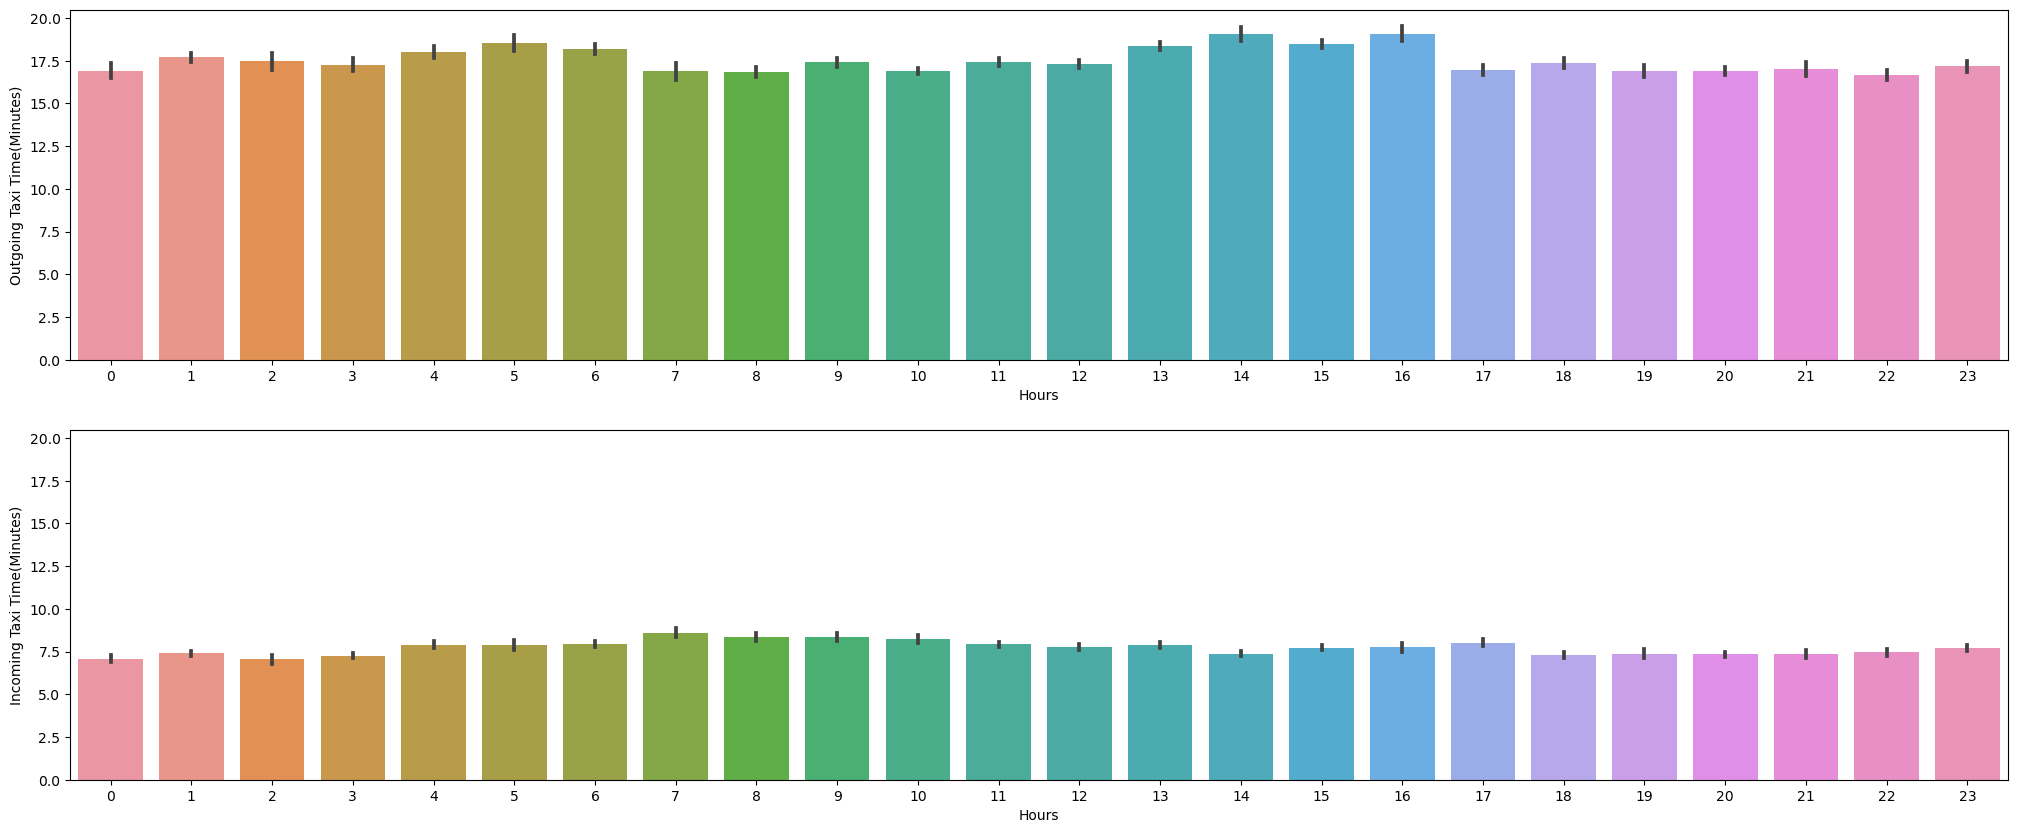

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharey=True)

sns.barplot(x='hourD', y='taxi_out', data=df_taxi, ax=ax[0])#,ax.set(xlabel='common xlabel', ylabel='common ylabel' )
#ax[0].set_yscale('log')
ax[0].set(xlabel='Hours', ylabel='Outgoing Taxi Time(Minutes)')


#df_taxi.sort_values('hourA', ascending=True)
sns.barplot(x='hourA', y='taxi_in', data=df_taxi, ax=ax[1])
#ax[1].set_yscale('log')
ax[1].set(xlabel='Hours', ylabel='Incoming Taxi Time(Minutes)')
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [111]:
df_flights_speed = df_flights_clean[['DistanceAirports','FlightTime','Delay_Departure']]
df_flights_speed = df_flights_speed[df_flights_speed.FlightTime != 0] #To avoid division by zero and exclude non applicable data
df_flights_speed['Late'] = df_flights_clean['Delay_Departure'].apply(lambda X: 'True' if X > 0 else 'False')
#use speed formula distancia divided by time
df_flights_speed['Speed'] = df_flights_clean['DistanceAirports'] / df_flights_clean['FlightTime']
df_flights_speed = df_flights_speed.dropna()
df_flights_speed

,DistanceAirports,FlightTime,Delay_Departure,Late,Speed
0,134,26.0,209.0,True,5.153846
1,157,30.0,2.0,True,5.233333
2,1282,180.0,-3.0,False,7.122222
3,214,44.0,-7.0,False,4.863636
4,84,18.0,-11.0,False,4.666667
...,...,...,...,...,...
99995,377,65.0,32.0,True,5.800000
99996,628,88.0,-8.0,False,7.136364
99997,606,99.0,-5.0,False,6.121212
99998,483,71.0,124.0,True,6.802817


In [112]:
df_flights_speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97988 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistanceAirports  97988 non-null  int64  
 1   FlightTime        97988 non-null  float64
 2   Delay_Departure   97988 non-null  float64
 3   Late              97988 non-null  object 
 4   Speed             97988 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.5+ MB


In [113]:
sr_mean = df_flights_speed.groupby("Late")["Speed"].mean()
sr_mean

Late
False    6.601106
True     6.756614
Name: Speed, dtype: float64

In [114]:
mean_cal = abs(sr_mean[0]- sr_mean[1])
mean_cal

0.15550776987368753

In [115]:
df_flights_speed

,DistanceAirports,FlightTime,Delay_Departure,Late,Speed
0,134,26.0,209.0,True,5.153846
1,157,30.0,2.0,True,5.233333
2,1282,180.0,-3.0,False,7.122222
3,214,44.0,-7.0,False,4.863636
4,84,18.0,-11.0,False,4.666667
...,...,...,...,...,...
99995,377,65.0,32.0,True,5.800000
99996,628,88.0,-8.0,False,7.136364
99997,606,99.0,-5.0,False,6.121212
99998,483,71.0,124.0,True,6.802817


In [116]:
df_late_flights = df_flights_speed[df_flights_speed['Late'] == 'True']
df_nolate_flights = df_flights_speed[df_flights_speed['Late'] == 'False']

In [117]:
df_speed_late = df_late_flights['Speed']
df_speed_nolate = df_nolate_flights['Speed']

In [118]:
df_speed_late

0        5.153846
1        5.233333
11       5.444444
12       5.235294
21       8.403974
           ...   
99992    7.615385
99994    7.539823
99995    5.800000
99998    6.802817
99999    6.685714
Name: Speed, Length: 33328, dtype: float64

In [119]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_speed_late,df_speed_nolate)


(18.663988267035272, 9.719853766413975e-78)

> Since p is less than 0.05 we can reject the null hypotesys

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [125]:
def haul_times(df):
    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
    result = df
    result['HaulType'] = df['FlightTime'].apply(lambda X: 'Short' if X <=120 else ('Medium' if X < 240 else 'Long'))
    return result

In [153]:
df_flights_sample.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-22,DL,DL,DL,2718,DL,N958DL,2718,10397,ATL,...,134,54.0,0.0,0.0,0.0,155.0,NaN,NaN,NaN,NaN
1,2018-04-03,AA,AA_CODESHARE,AA,3261,OO,N908EV,3261,13930,ORD,...,157,0.0,0.0,13.0,0.0,2.0,NaN,NaN,NaN,NaN
2,2019-11-24,DL,DL,DL,2293,DL,N931DN,2293,10397,ATL,...,1282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-24,DL,DL_CODESHARE,DL,6155,YX,N216JQ,6155,12953,LGA,...,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-23,HA,HA,HA,229,HA,N490HA,229,12758,KOA,...,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df_haul_data = df_flights_clean[['FlightTime','ActualDeparture']]
df_haul_data = df_haul_data.dropna()

In [158]:
df_haul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98017 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlightTime       98017 non-null  float64
 1   ActualDeparture  98017 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [159]:
df_haul_data[['hour','min']] = df_haul_data['ActualDeparture'].str.split(':', expand=True)
df_haul_data['hour'] = pd.to_numeric(df_haul_data['hour'])
df_haul_data = df_haul_data.astype({'hour':'int'})
df_haul_data

,FlightTime,ActualDeparture,hour,min
0,26.0,00:07,0,07
1,30.0,06:51,6,51
2,180.0,08:35,8,35
3,44.0,05:13,5,13
4,18.0,16:49,16,49
...,...,...,...,...
99995,65.0,18:57,18,57
99996,88.0,15:14,15,14
99997,99.0,01:28,1,28
99998,71.0,08:29,8,29


In [189]:
df_haul_processed = haul_times(df_haul_data)
df_haul_processed 
#df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)

#df_haul_data

,FlightTime,ActualDeparture,hour,min,HaulType
0,26.0,00:07,0,07,Short
1,30.0,06:51,6,51,Short
2,180.0,08:35,8,35,Medium
3,44.0,05:13,5,13,Short
4,18.0,16:49,16,49,Short
...,...,...,...,...,...
99995,65.0,18:57,18,57,Short
99996,88.0,15:14,15,14,Short
99997,99.0,01:28,1,28,Short
99998,71.0,08:29,8,29,Short


In [204]:
#Hour with most Short haul takeoff
df_haul_short = df_haul_processed[df_haul_processed['HaulType'] == 'Short']
df_haul_short = df_haul_short[['hour','HaulType']].groupby(['hour']).count()
df_haul_short.nlargest(1,'HaulType')

,HaulType
hour,
10,4831


In [205]:
#Hour with most Medium haul takeoff
df_haul_medium = df_haul_processed[df_haul_processed['HaulType'] == 'Medium']
df_haul_medium = df_haul_medium[['hour','HaulType']].groupby(['hour']).count()
df_haul_medium.nlargest(1,'HaulType')

,HaulType
hour,
10,2157


In [206]:
#Hour with most Long haul takeoff
df_haul_long = df_haul_processed[df_haul_processed['HaulType'] == 'Long']
df_haul_long = df_haul_long[['hour','HaulType']].groupby(['hour']).count()
df_haul_long.nlargest(1,'HaulType')


,HaulType
hour,
13,601


#### Graphs with all the Haul Types by hours

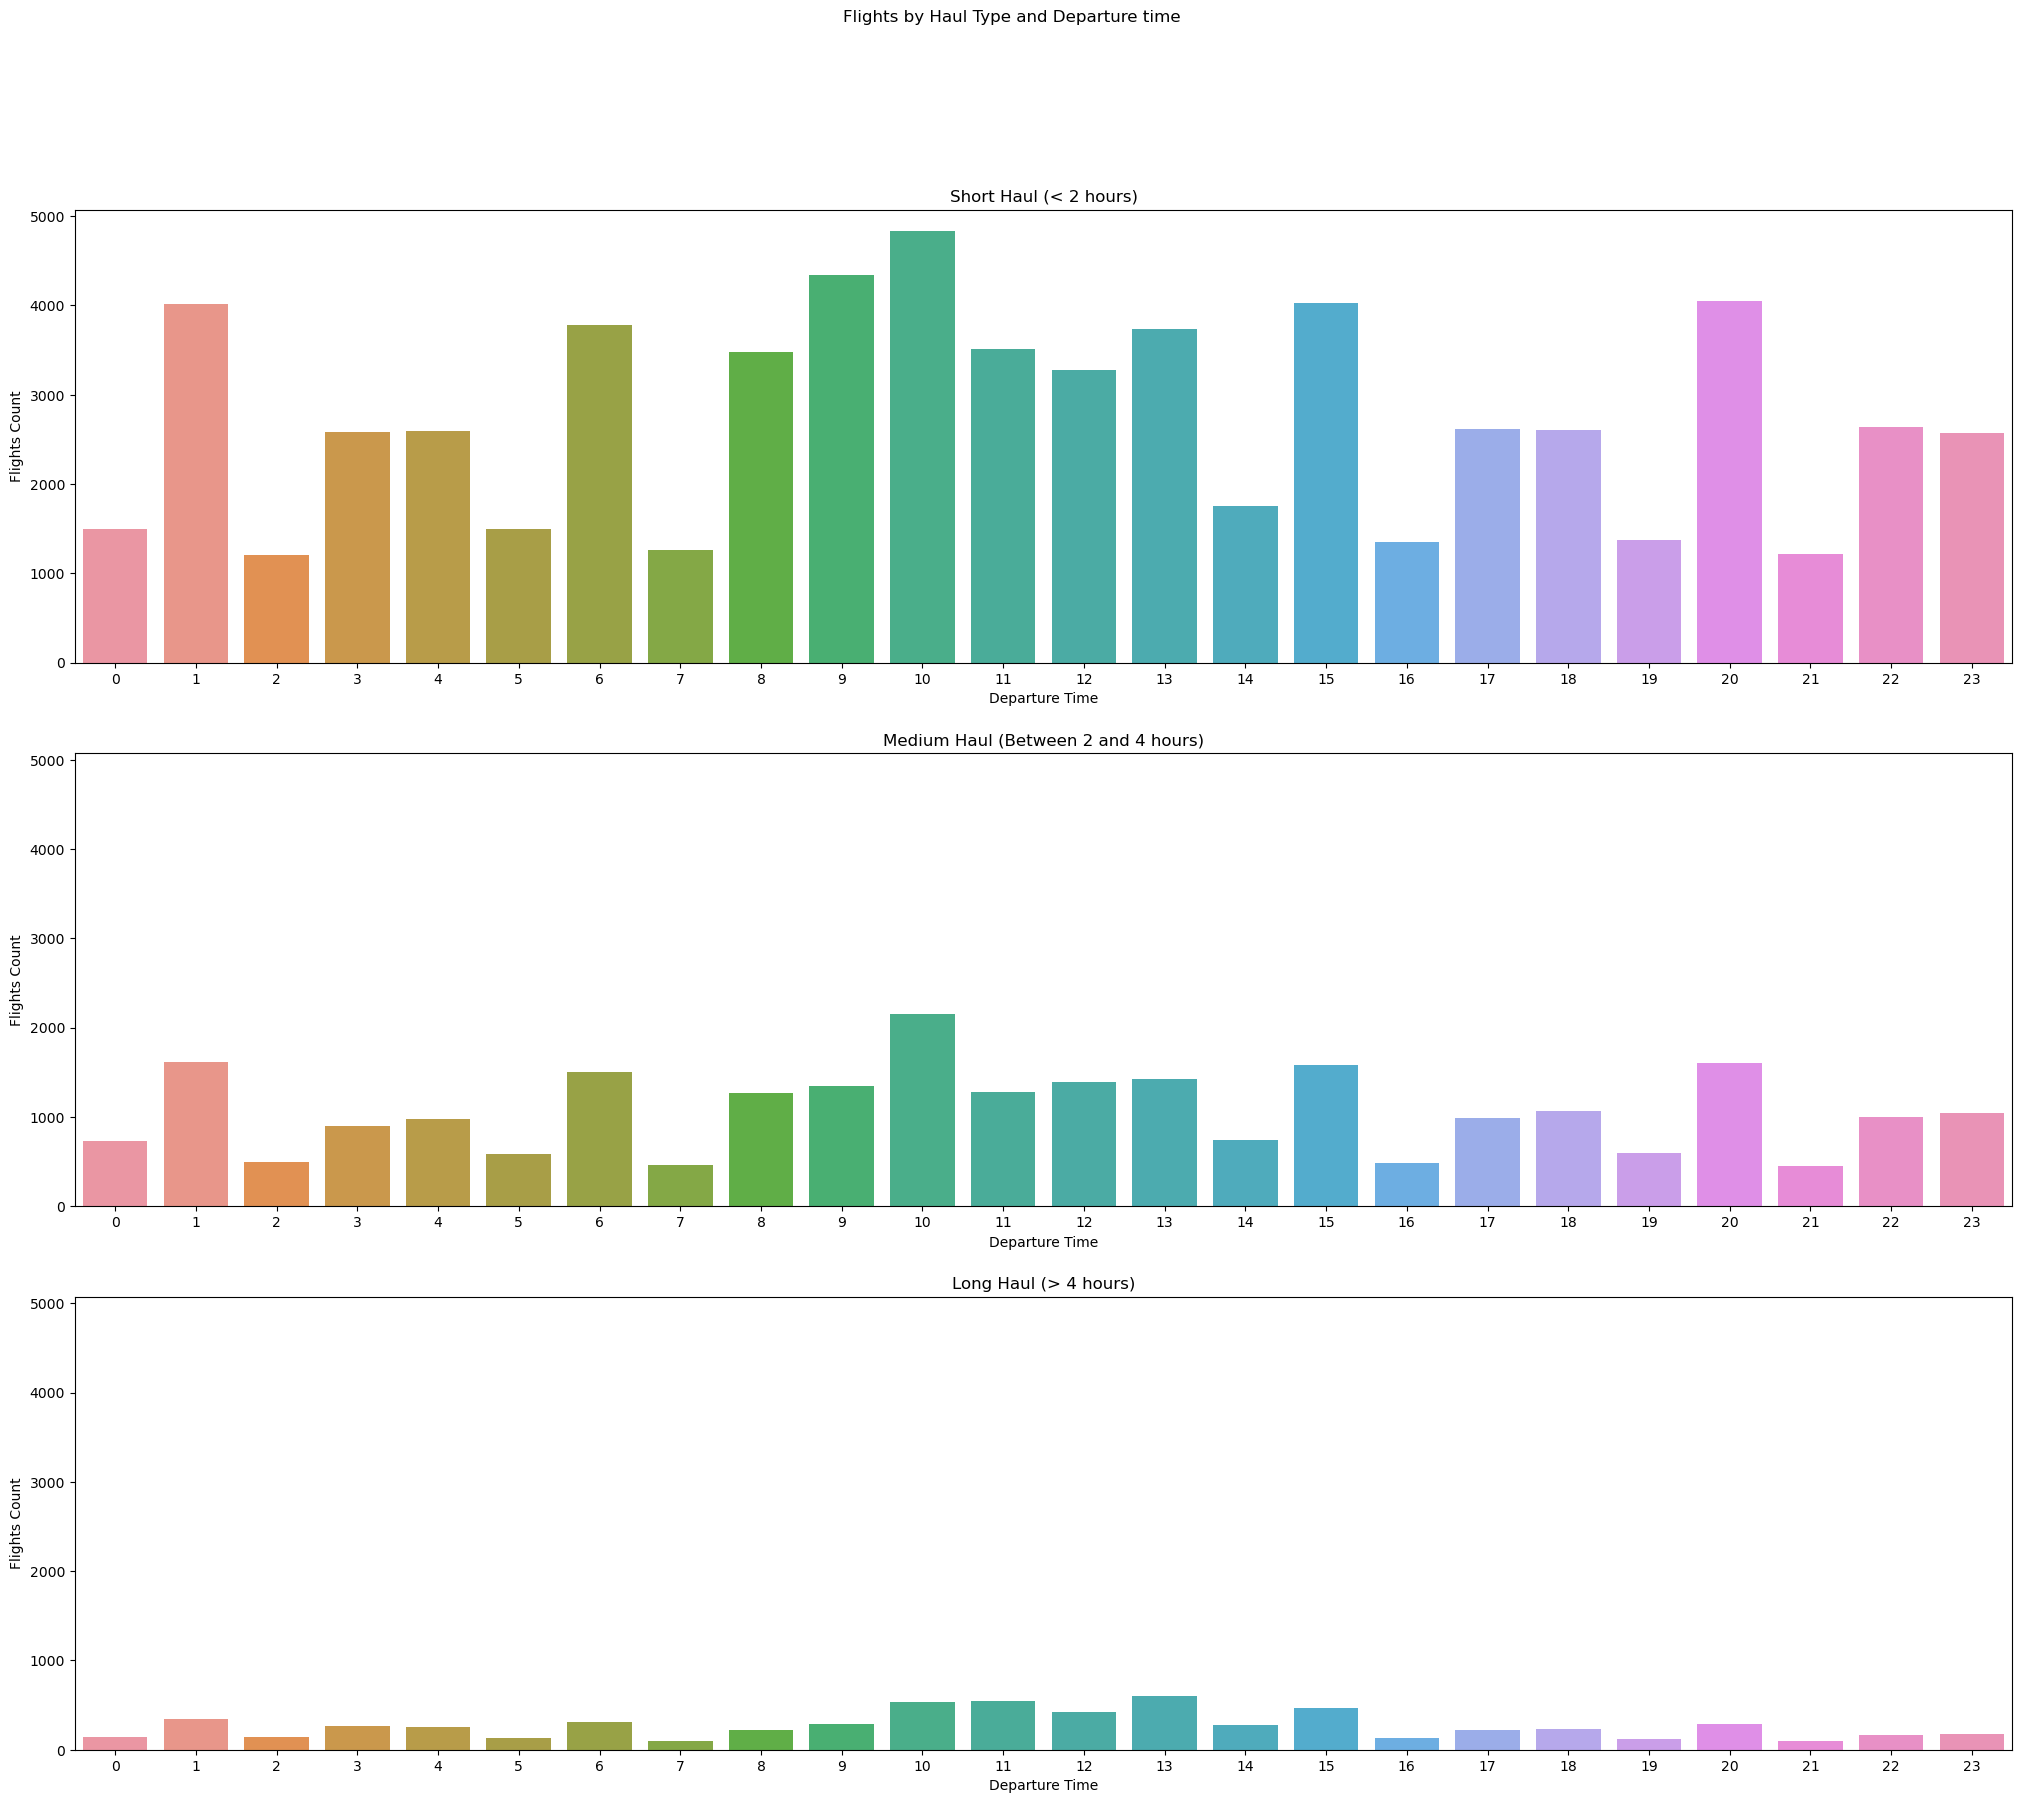

In [178]:
fig, ax = plt.subplots(3, 1, figsize=(25, 20), sharey=True)
fig.suptitle('Flights by Haul Type and Departure time')

sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Short'] , ax=ax[0])
ax[0].set(xlabel='Departure Time', ylabel='Flights Count')
ax[0].set_title('Short Haul (< 2 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Medium'] , ax=ax[1])
ax[1].set(xlabel='Departure Time', ylabel='Flights Count')
ax[1].set_title('Medium Haul (Between 2 and 4 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Long'] , ax=ax[2])
ax[2].set(xlabel='Departure Time', ylabel='Flights Count')
ax[2].set_title('Long Haul (> 4 hours)')

    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?